In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import sklearn
from statsmodels.stats.outliers_influence import variance_inflation_factor #importing of VIF 
from sklearn.decomposition import PCA

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
df1=pd.read_csv('database_AUS.csv')
df1.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df2=pd.read_csv('database_IND.csv')
df2.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
df3=pd.read_csv('database_USA.csv')
df3.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,USA,United States of America,10 Briggs Solar NG LLC (East),USA0062781,0.0,41.6327,-71.4963,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.0,41.0930,-73.9828,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.467,U.S. Energy Information Administration,NaN
2,USA,United States of America,1001 Ebenezer Church Solar,USA0063444,0.0,36.2838,-80.8434,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,United States of America,1008 Matthews Solar,USA0063447,0.0,36.2167,-80.5525,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,United States of America,1009 Yadkin Solar,USA0063445,0.0,36.1475,-80.6561,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Combining the models**

In [6]:
df = pd.concat([df1,df2,df3], ignore_index=True)

In [7]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df.shape)

(512, 27)
(907, 27)
(11879, 27)
(13298, 27)


So all three databases are combined 

I am dropping all the columns that are not required or have no importnace at all

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url   

In [10]:
df.drop(["country_long","name","gppd_idnr","owner","source","url","geolocation_source","wepp_id","year_of_capacity_data","generation_data_source","generation_data_source","commissioning_year"],axis=1,inplace=True)

All the unncessary columns that are not required by understanding the features are been dropped

**Exploratory Data Analysis**

In [11]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,estimated_generation_gwh
count,13292.000000,13220.000000,13220.000000,7170.000000,7534.000000,7993.000000,8701.000000,9292.000000,9858.000000,0.0
mean,117.738717,35.053213,-73.794217,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,NaN
std,347.169038,15.444195,62.868834,2030.523760,2193.172655,2148.167470,2050.411295,2001.411908,1963.485305,NaN
min,0.000000,-42.888300,-171.712400,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,NaN
25%,1.500000,33.901700,-104.659875,1.653075,2.018000,2.140000,2.108000,2.063750,2.141250,NaN
50%,5.500000,38.389750,-87.346000,21.384500,22.241000,19.504000,15.410278,13.433861,12.308500,NaN
75%,52.725000,42.175125,-75.475925,185.326498,217.069500,200.279000,173.348004,157.889688,149.141249,NaN
max,6809.000000,425.246100,153.434100,31431.080000,32320.917000,32525.595000,32377.477000,35116.000000,35136.000000,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   capacity_mw               13292 non-null  float64
 2   latitude                  13220 non-null  float64
 3   longitude                 13220 non-null  float64
 4   primary_fuel              11294 non-null  object 
 5   other_fuel1               1628 non-null   object 
 6   other_fuel2               270 non-null    object 
 7   other_fuel3               92 non-null     object 
 8   generation_gwh_2013       7170 non-null   float64
 9   generation_gwh_2014       7534 non-null   float64
 10  generation_gwh_2015       7993 non-null   float64
 11  generation_gwh_2016       8701 non-null   float64
 12  generation_gwh_2017       9292 non-null   float64
 13  generation_gwh_2018       9858 non-null   float64
 14  genera

***Check for duplicates***

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape 

(13241, 16)

There are some duplicates that are been removed

***Check for null values***

In [15]:
df.isnull().sum()

country                         0
capacity_mw                     6
latitude                       47
longitude                      47
primary_fuel                 1952
other_fuel1                 11613
other_fuel2                 12971
other_fuel3                 13149
generation_gwh_2013          6072
generation_gwh_2014          5707
generation_gwh_2015          5248
generation_gwh_2016          4540
generation_gwh_2017          3949
generation_gwh_2018          3383
generation_gwh_2019          3464
estimated_generation_gwh    13241
dtype: int64

we have no proper data there are so many null values in otherfuel and estimated_generation_gwh -->So these can be dropped

After that we will deal with the outliers

In [16]:
df.drop(["estimated_generation_gwh","other_fuel1","other_fuel2","other_fuel3","generation_gwh_2019"],axis=1,inplace=True)

In [17]:
df.isnull().sum()

country                   0
capacity_mw               6
latitude                 47
longitude                47
primary_fuel           1952
generation_gwh_2013    6072
generation_gwh_2014    5707
generation_gwh_2015    5248
generation_gwh_2016    4540
generation_gwh_2017    3949
generation_gwh_2018    3383
dtype: int64

In [18]:
df.shape

(13241, 11)

In [19]:
type(df["capacity_mw"].median())

float

In [20]:
categorical_cols=[]
numerical_cols=[]
for x in df.columns:
    if df.dtypes[x]== 'object' :
        categorical_cols.append(x)
    elif df.dtypes[x]=='float64' or df.dtypes[x]=='int64':
        numerical_cols.append(x)

In [21]:
#as all the numerical columns are having skewness replace it with the median

for i in numerical_cols:
    df[i].fillna(df[i].median(),inplace=True)

In [22]:
df.isnull().sum()

country                   0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel           1952
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
dtype: int64

In [23]:
df['primary_fuel'].fillna("solar",inplace=True)

All the null values are dropped

In [24]:
df.isnull().sum()

country                0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13241 entries, 0 to 13297
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              13241 non-null  object 
 1   capacity_mw          13241 non-null  float64
 2   latitude             13241 non-null  float64
 3   longitude            13241 non-null  float64
 4   primary_fuel         13241 non-null  object 
 5   generation_gwh_2013  13241 non-null  float64
 6   generation_gwh_2014  13241 non-null  float64
 7   generation_gwh_2015  13241 non-null  float64
 8   generation_gwh_2016  13241 non-null  float64
 9   generation_gwh_2017  13241 non-null  float64
 10  generation_gwh_2018  13241 non-null  float64
dtypes: float64(9), object(2)
memory usage: 1.2+ MB


All the null values are removed

***check for outliers***

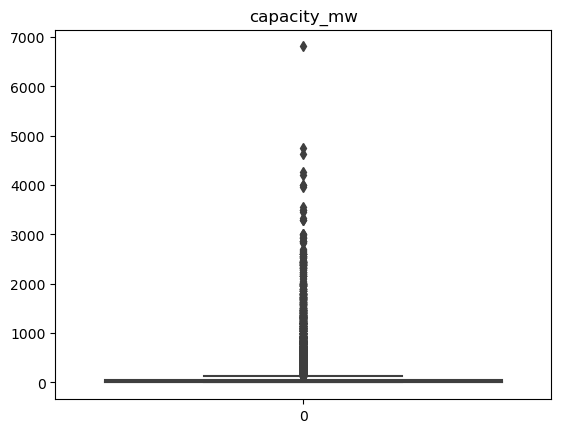

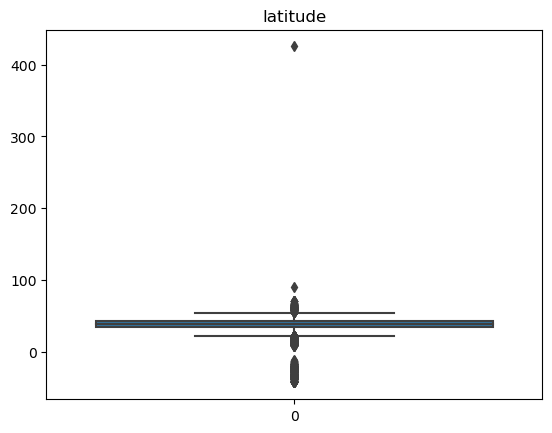

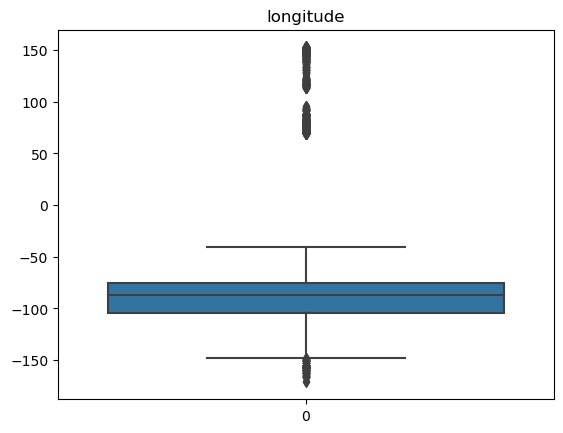

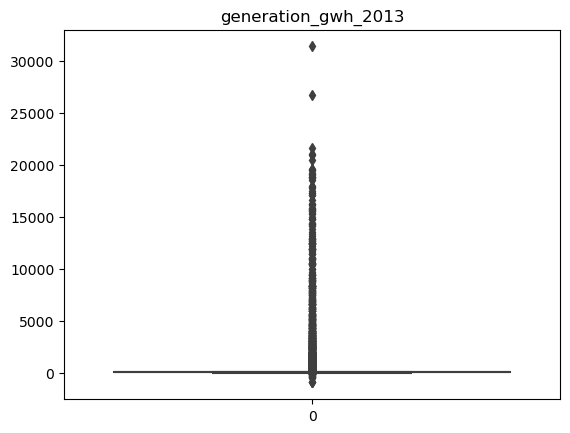

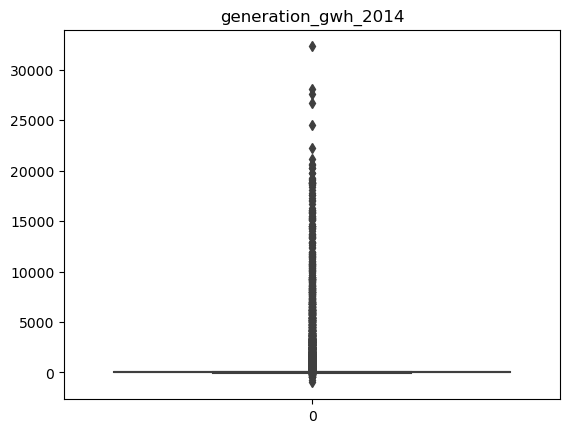

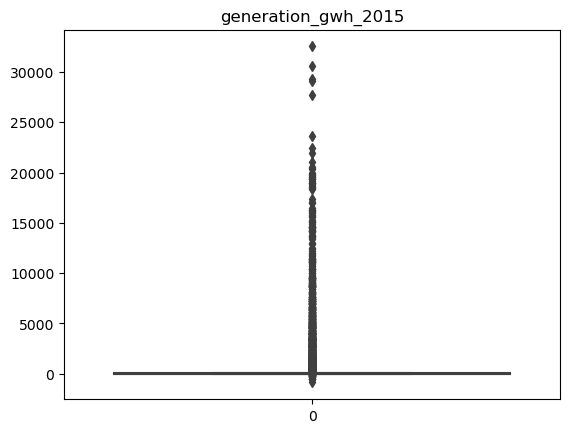

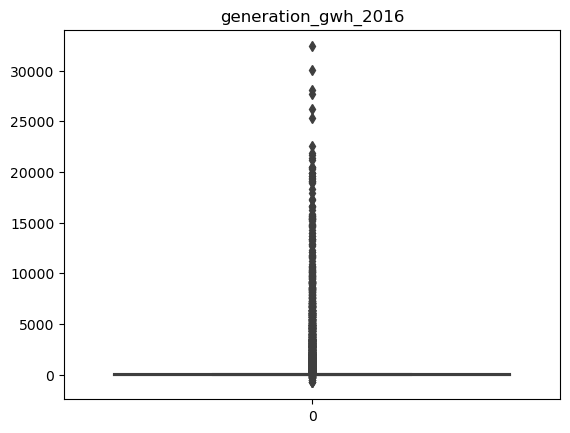

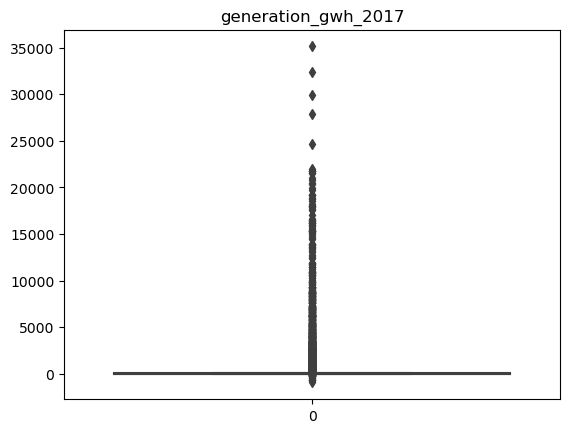

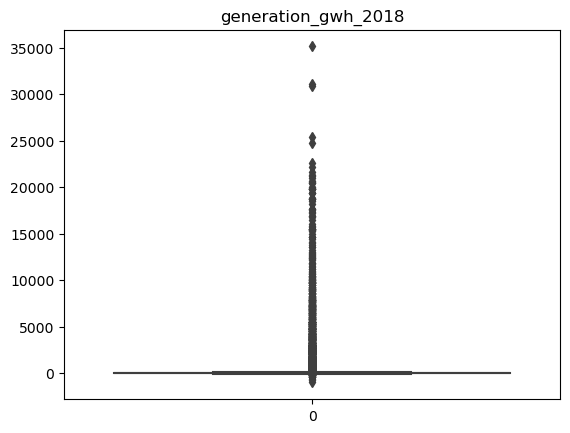

In [26]:
for i in numerical_cols:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()


In [27]:
for i in numerical_cols:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)

    Q1=df[i].quantile(0.25)

    Q2=df[i].quantile(0.75)

    lowl=Q1-1.5*IQR
    print(lowl)
    upperl=Q2+1.5*IQR
    print(upperl)
    
    new_df=df[i].copy()
    
    new_df=np.where(new_df > upperl , upperl ,
                           np.where(new_df <lowl, lowl ,new_df
                                   )
                           )
    df[i]=new_df

-75.95
130.85
21.518900000000002
54.566900000000004
-148.20940000000002
-31.87339999999999
-5.610999999999999
48.533
-22.173499999999997
70.1745
-38.6375
88.6145
-53.873000000000005
106.727
-66.5485
124.15950000000001
-75.6935
136.9425


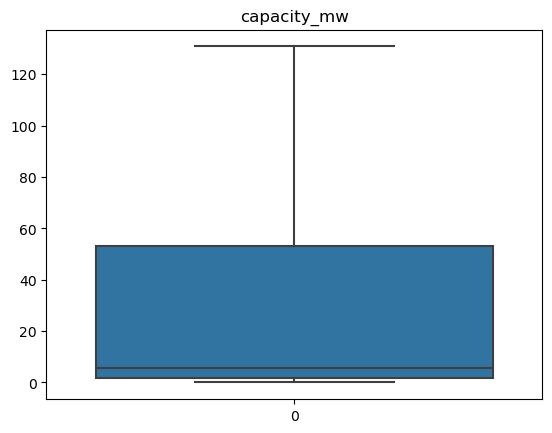

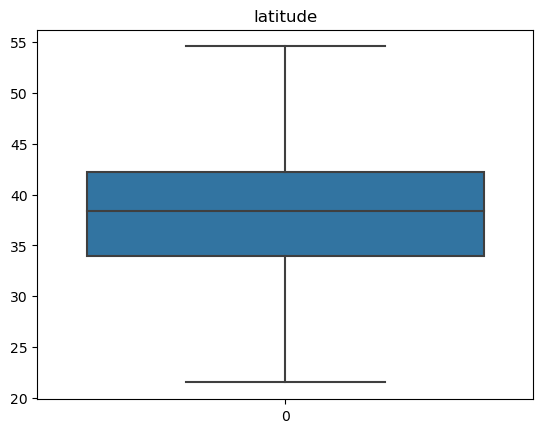

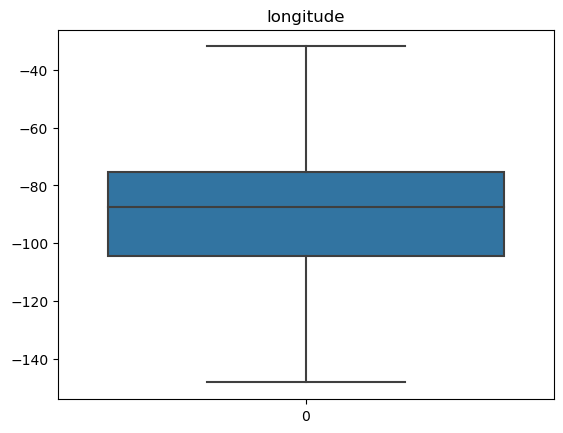

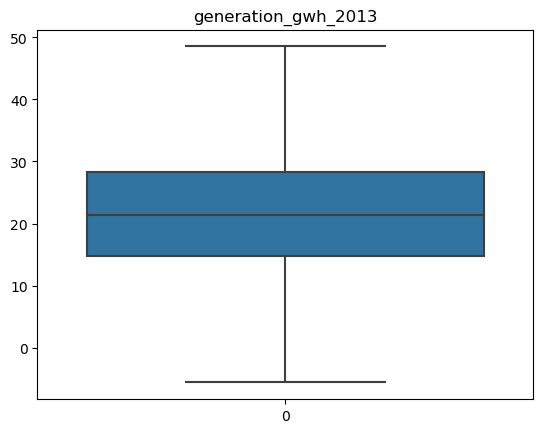

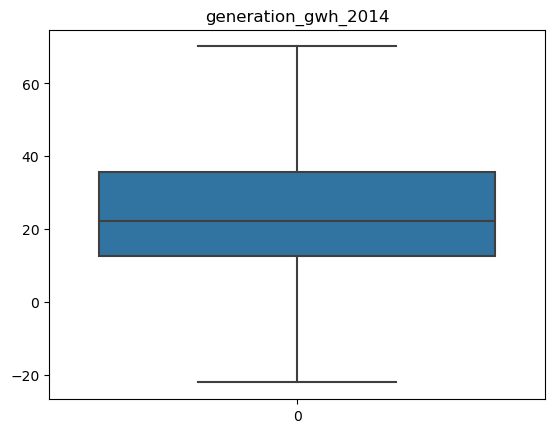

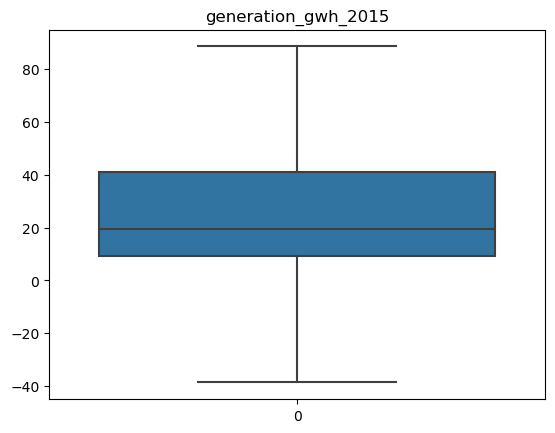

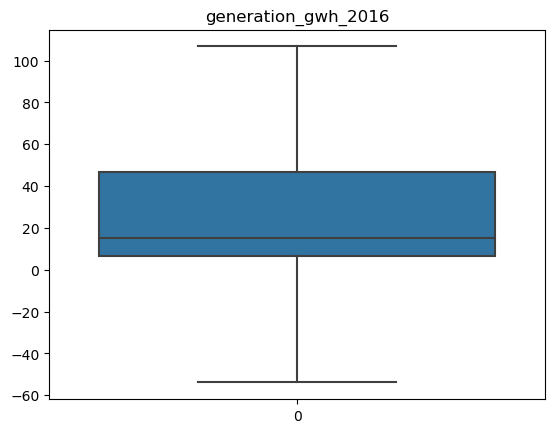

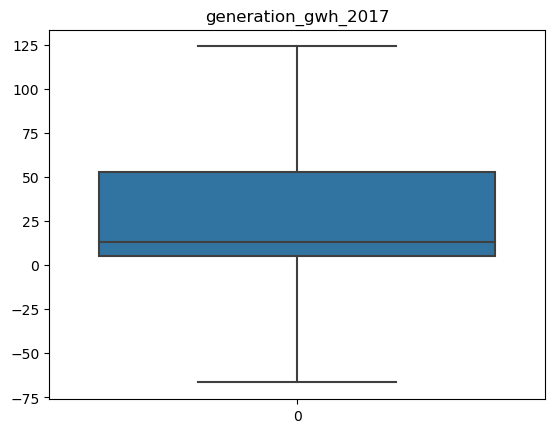

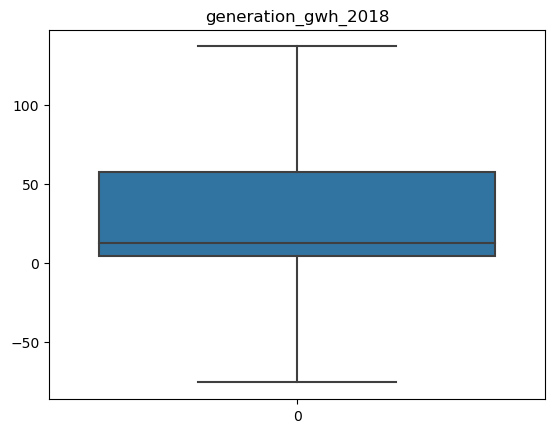

In [28]:
for i in numerical_cols:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

So the outliers which are present in some of the features are also removed

***check for skewness***

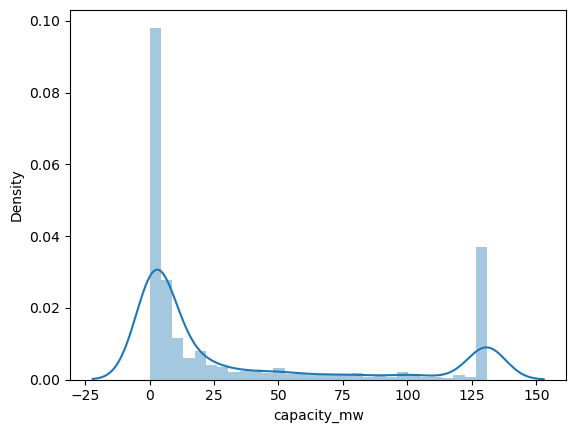

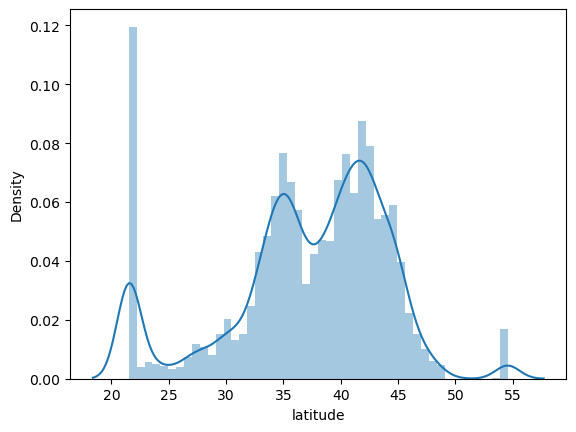

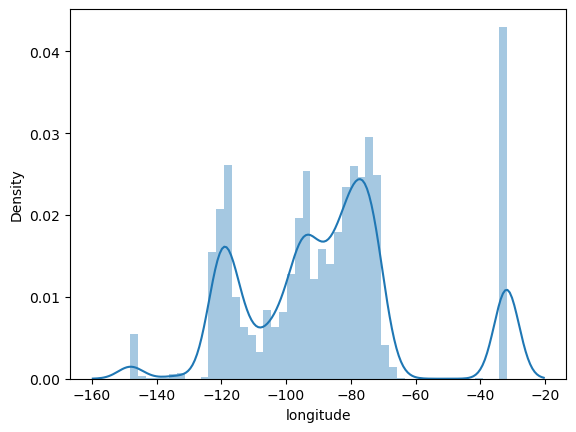

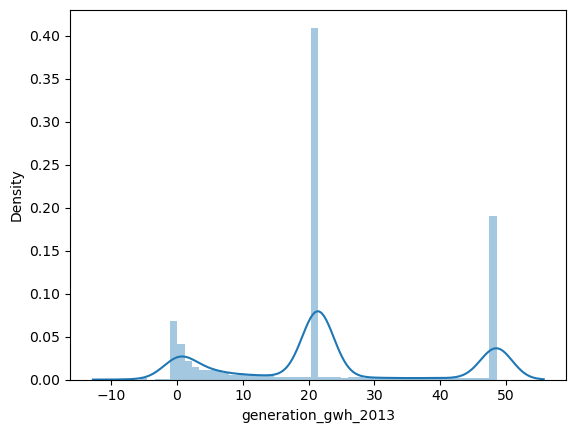

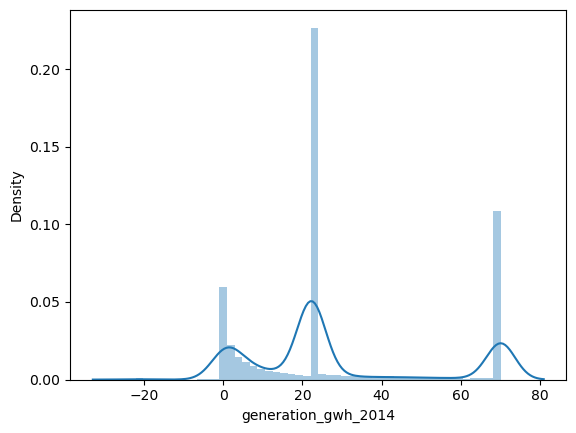

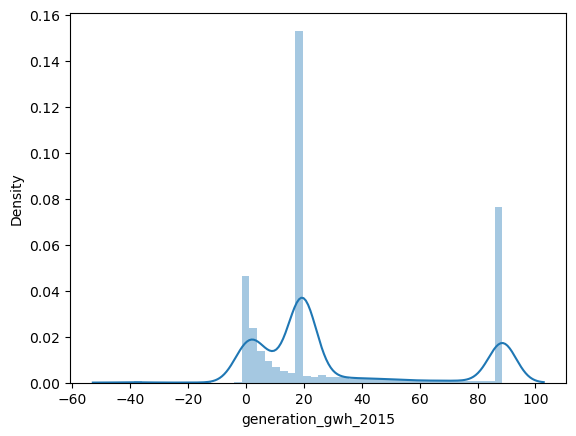

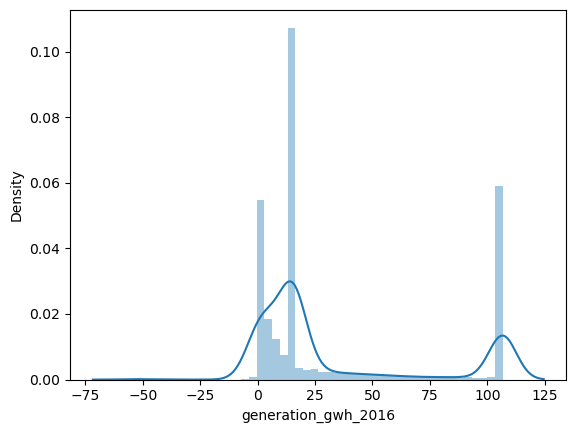

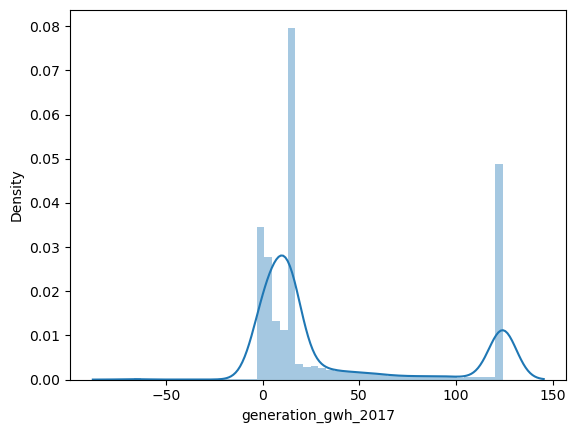

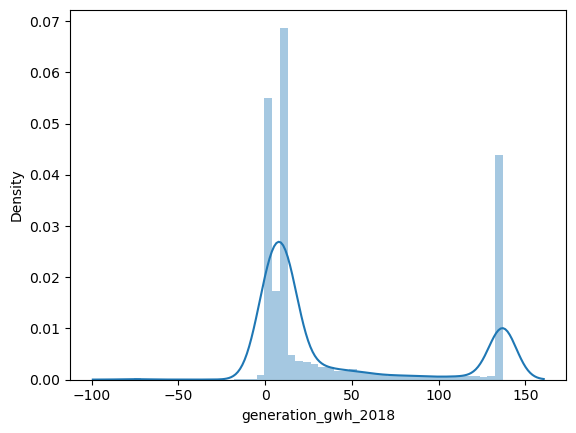

In [29]:
for i in numerical_cols:
    sns.distplot(df[i],kde=True)
    plt.show()

Transformation to get rid of skewness

In [30]:
for i in numerical_cols:
    df[i] = np.sqrt(df[i])

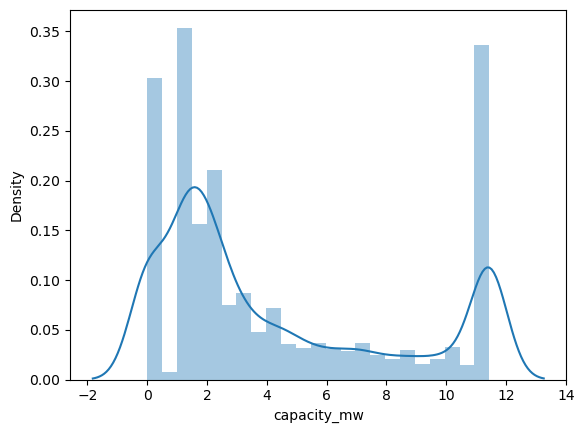

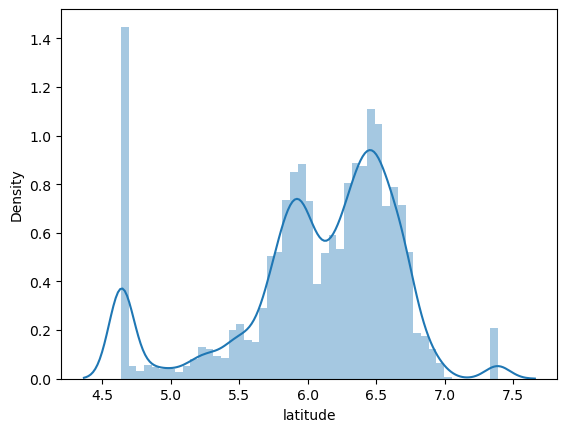

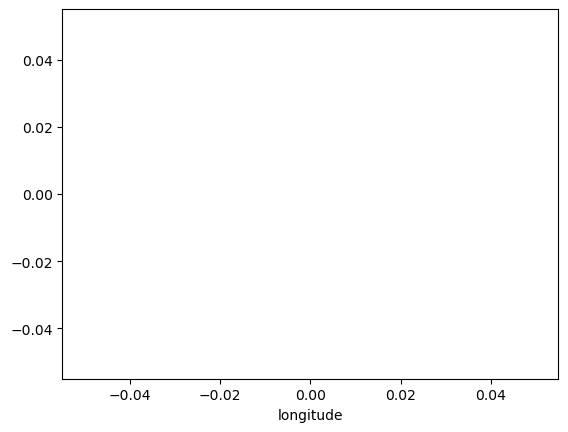

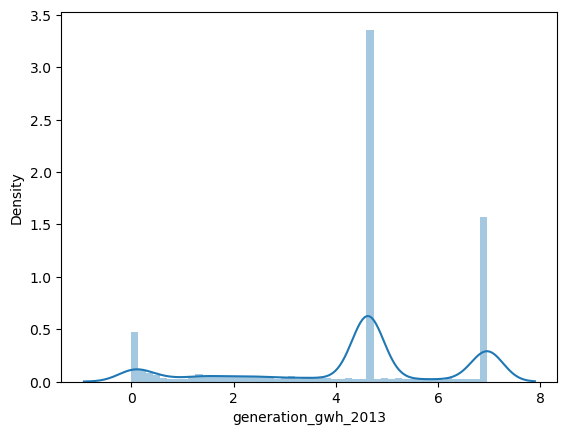

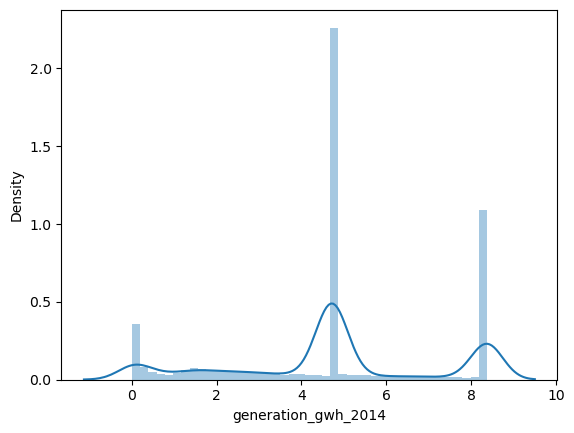

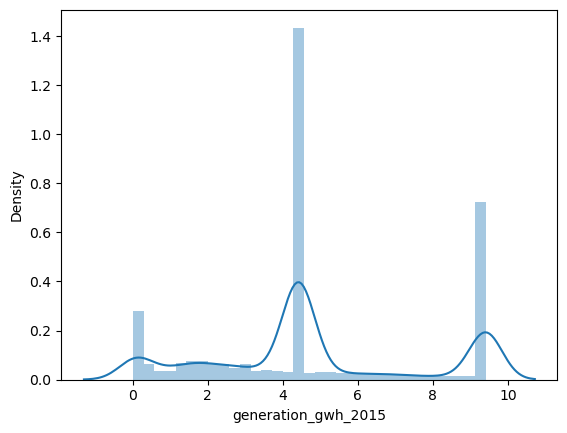

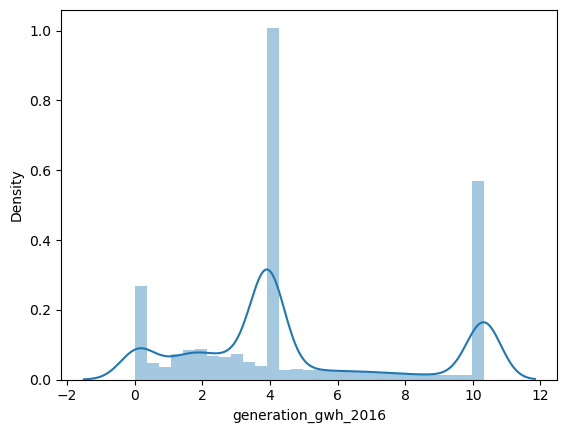

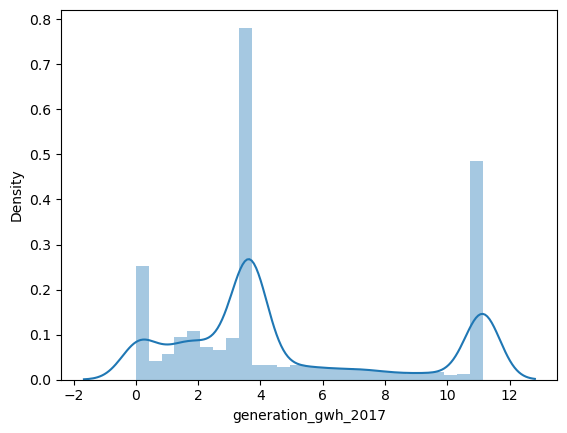

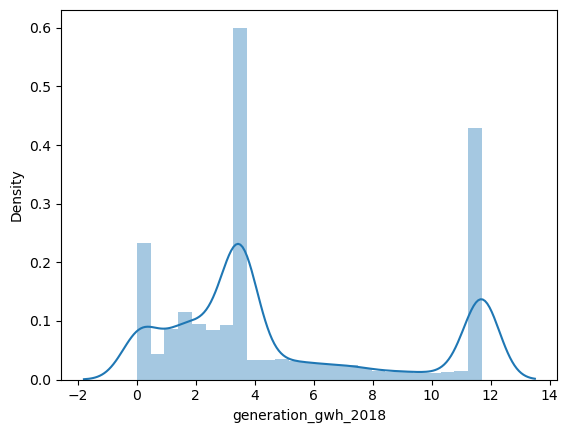

In [31]:
for i in numerical_cols:
    sns.distplot(df[i],kde=True)
    plt.show()

Skewness is managed

***encoding***

In [32]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [33]:
for i in df[categorical_cols]:
    df[i]=le.fit_transform(df[i])
df.head()

,country,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,0.331662,4.638847,NaN,10,4.625689,4.716036,4.416333,3.925593,3.665223,3.508347
1,0,1.000000,4.638847,NaN,10,4.625689,4.716036,4.416333,3.925593,3.665223,3.508347
2,0,4.647580,4.638847,NaN,13,6.966563,8.377022,9.413528,9.791465,9.268240,9.627161
3,0,0.489898,4.638847,NaN,10,4.625689,4.716036,4.416333,3.925593,3.665223,3.508347
4,0,2.000000,4.638847,NaN,7,4.625689,4.716036,4.416333,3.925593,3.665223,3.508347


In [34]:
df.drop(['latitude','longitude'],axis=1,inplace=True)

In [35]:
df.isnull().sum()

country                  0
capacity_mw              0
primary_fuel             0
generation_gwh_2013    139
generation_gwh_2014    137
generation_gwh_2015    157
generation_gwh_2016    167
generation_gwh_2017    174
generation_gwh_2018    171
dtype: int64

In [36]:
df.dropna(inplace=True)

***Check for Correlation between feautures***

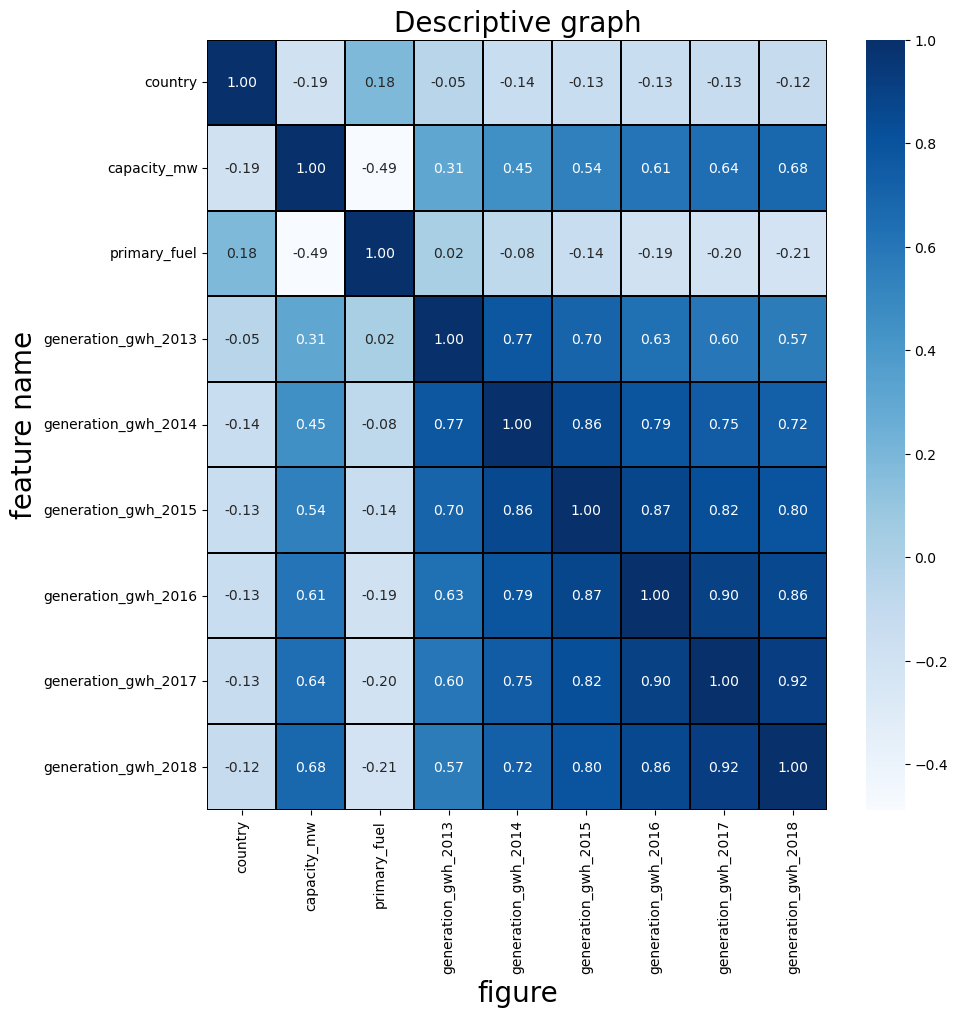

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Blues')
plt.xlabel('figure',fontsize=20)
plt.ylabel('feature name',fontsize=20)
plt.title('Descriptive graph',fontsize=20)
plt.show()

In [38]:
def calc_vif(df):
    vif=pd.DataFrame()
    vif['Variables']=df.columns
    vif['VIF FACTOR']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return(vif)

In [39]:
calc_vif(df)

,Variables,VIF FACTOR
0,country,7.926940
1,capacity_mw,4.596853
2,primary_fuel,5.865755
3,generation_gwh_2013,14.445074
4,generation_gwh_2014,23.463751
5,generation_gwh_2015,24.510404
6,generation_gwh_2016,23.332312
7,generation_gwh_2017,24.341728
8,generation_gwh_2018,18.877084


In [40]:
df.drop(['generation_gwh_2014'],axis=1,inplace=True)

We can see most of the features are highly correlated with each other so some features must be dropped to prevent overfitting

In [41]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [42]:
corr_features=correlation(df,0.90)

In [43]:
print(corr_features)

{'generation_gwh_2018'}


So correlation between features are rectified

***PART1 REGRESSION MODEL CAPACITY MW***

***check of correlation with the features with the target***

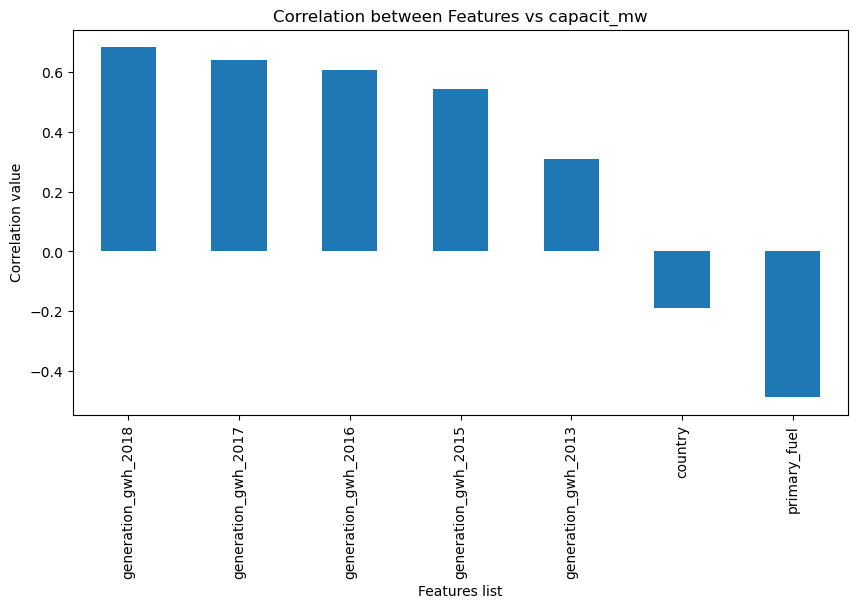

In [44]:
df_corr=df.corr()
plt.figure(figsize=(10,5))
df_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation between Features vs capacit_mw")
plt.xlabel('Features list')
plt.ylabel('Correlation value')
plt.show()

***Splitting of data into features and target***

In [45]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

***Scaling or standardization of parameters***

In [46]:
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[-4.0823315 ,  0.37151727,  0.10865247, ..., -0.26338465,
        -0.33060352, -0.36722621],
       [-4.0823315 ,  0.37151727,  0.10865247, ..., -0.26338465,
        -0.33060352, -0.36722621],
       [-4.0823315 ,  1.0754046 ,  1.25292238, ...,  1.49629861,
         1.18204386,  1.16918569],
       ...,
       [ 0.32743967,  1.31003371,  0.10865247, ..., -0.26338465,
        -0.33060352, -0.36722621],
       [ 0.32743967,  1.31003371, -2.1524847 , ..., -0.26338465,
        -0.33060352, -0.36722621],
       [ 0.32743967, -1.27088649, -0.39218357, ...,  1.18094879,
         1.04319096,  0.92970176]])

***Find the best random score***

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [48]:
lr=LinearRegression()
maxAcc=0
rs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=r2_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
        
print("Best score ",maxAcc)
print("random state ",rs)

Best score  0.624300041419557
random state  158


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [50]:
def Regression(lr,x,y):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=158)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    print("R2 score for test data:",r2_score(y_test,pred_test))
    print("R2 score train data :",r2_score(y_train,pred_train)*100)
    print("Mean absolute error:",mean_absolute_error(y_test,pred_test))
    print("Mean squared error:",mean_squared_error(y_test,pred_test))
    print("Root Mean squared error:",np.sqrt(mean_absolute_error(y_test,pred_test)))

In [51]:
lr=LinearRegression()
Regression(lr,x,y)

R2 score for test data: 0.624300041419557
R2 score train data : 58.49432127751608
Mean absolute error: 1.7838528469965234
Mean squared error: 6.253889610552635
Root Mean squared error: 1.3356095413692295


In [52]:
lr=RandomForestRegressor()
Regression(lr,x,y)

R2 score for test data: 0.8270076267734148
R2 score train data : 89.93271592232266
Mean absolute error: 0.9486089464305829
Mean squared error: 2.8796255653430944
Root Mean squared error: 0.9739655776415216


In [53]:
lr=KNN()
Regression(lr,x,y)

R2 score for test data: 0.7756029430969197
R2 score train data : 81.3720886896908
Mean absolute error: 1.085455350917621
Mean squared error: 3.7353063016222907
Root Mean squared error: 1.041851885306938


In [54]:
lr=Ridge()
Regression(lr,x,y)

R2 score for test data: 0.6242947426081494
R2 score train data : 58.49431950569678
Mean absolute error: 1.7839183361845115
Mean squared error: 6.25397781439949
Root Mean squared error: 1.335634057736067


In [55]:
lr=Lasso()
Regression(lr,x,y)

R2 score for test data: 0.500607504151344
R2 score train data : 47.719069100419745
Mean absolute error: 2.3736761036453817
Mean squared error: 8.312871668063138
Root Mean squared error: 1.5406739121713529


Out of this Random Forest regressor gives the best results

***Hyperparameter tuning for regression***

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=63)

model = RandomForestRegressor()
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Set Score:", test_score)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.8229106115390479
Test Set Score: 0.8177632258477918


In [58]:
best_model = RandomForestRegressor(n_estimators=100,max_depth=20,min_samples_split=10,min_samples_leaf=2)

best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)
print(best_model.score(x_test, y_test))

Test MSE: 2.9379895129027593
0.8180207219349236


***saving the model***

In [59]:
import joblib

joblib.dump(best_model, 'capacity.joblib')

['capacity.joblib']

In [60]:
loaded_model = joblib.load('capacity.joblib')

In [61]:
x

,country,primary_fuel,generation_gwh_2013,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,10,4.625689,4.416333,3.925593,3.665223,3.508347
1,0,10,4.625689,4.416333,3.925593,3.665223,3.508347
2,0,13,6.966563,9.413528,9.791465,9.268240,9.627161
3,0,10,4.625689,4.416333,3.925593,3.665223,3.508347
4,0,7,4.625689,4.416333,3.925593,3.665223,3.508347
...,...,...,...,...,...,...,...
13293,2,13,1.915985,1.577656,1.292285,1.110626,1.621727
13294,2,10,4.625689,4.416333,3.925593,3.665223,1.077497
13295,2,14,4.625689,4.416333,3.925593,3.665223,3.508347
13296,2,14,0.000000,0.000000,3.925593,3.665223,3.508347


***test the model***

In [65]:
t=np.array([2,13,1.915985,1.577656,1.292285,1.110626,1.621727])

In [66]:
t=t.reshape(1,-1)

In [67]:
loaded_model.predict(t) 

array([0.8063189])

We are getting proper results

# ***PART2 CLASSIFICATION PRIMARY FUEL***

***Checking of correlation with the target***

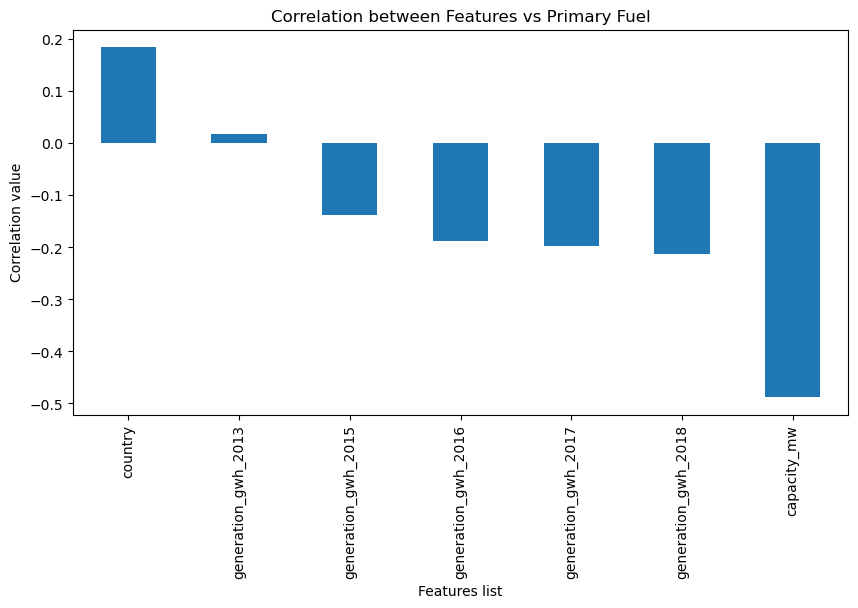

In [68]:
df_corr=df.corr()
plt.figure(figsize=(10,5))
df_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation between Features vs Primary Fuel")
plt.xlabel('Features list')
plt.ylabel('Correlation value')
plt.show()

***Splitting of data into features and target***

In [69]:
x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']

***Scaling or standardization of parameters***

In [70]:
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[-4.0823315 , -0.97682046,  0.10865247, ..., -0.26338465,
        -0.33060352, -0.36722621],
       [-4.0823315 , -0.81203767,  0.10865247, ..., -0.26338465,
        -0.33060352, -0.36722621],
       [-4.0823315 ,  0.08729594,  1.25292238, ...,  1.49629861,
         1.18204386,  1.16918569],
       ...,
       [ 0.32743967, -1.05859391,  0.10865247, ..., -0.26338465,
        -0.33060352, -0.36722621],
       [ 0.32743967, -1.05859391, -2.1524847 , ..., -0.26338465,
        -0.33060352, -0.36722621],
       [ 0.32743967, -0.28675079, -0.39218357, ...,  1.18094879,
         1.04319096,  0.92970176]])

***Find the best random score***

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB as MNB

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV


In [72]:
lr=RandomForestClassifier()
maxAcc=0
rs=0
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=accuracy_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
        
print("Best score ",maxAcc)
print("random state ",rs)

Best score  0.6997833488084184
random state  52


In [79]:
def classify(clf,X,y):
        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=52)
        
        #train the model
        clf.fit(x_train,y_train)
        
        #predicting Ytest
        pred=clf.predict(x_test)
        
        #accuracy score
        acc_score=accuracy_score(y_test,pred)
        print("Accuracy score",acc_score)
        
        #confusion matrix
        print("Confusion matrix :\n",confusion_matrix(y_test,pred))
        
        #classification report
        print("Classification report :\n",classification_report(y_test,pred))
        
        #cross validation score
        cv_score=(cross_val_score(clf,x,y,cv=5).mean())
        print("cross validation score ",cv_score)
        
        #Result of accuracy minus cv scores
        result=acc_score-cv_score
        print("The final result of accuracy minus cross validation is ",result)

In [80]:
clf=LogisticRegression()
classify(clf,X,y)

Accuracy score 0.5685546270504488
Confusion matrix :
 [[  0   0   0   6   0  13   0   0   0   0  30   0   0   2   1]
 [  0  44   0  84   0   5   0   4   0   0   3   0   0   2   0]
 [  0   0   0   0   0   5   0   2   0   0   3   0   0   0   0]
 [  0  18   0 253   0  52   0  62   0   0  99   0   0  10   0]
 [  0   0   0   1   0   9   0   0   0   0   2   0   0   1   0]
 [  0  35   0  46   0 108   0   6   0   0 223   0   0  19   1]
 [  0   1   0  15   0   0   0   0   0   0   0   0   0   0   2]
 [  0   1   0  26   0   6   0 121   0   0  38   0   0   1   1]
 [  0   0   0   1   0   1   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   3   0  48   0  54   0   2   0   0 791   0   0   1   2]
 [  0   0   0   0   0   0   0   0   0   0  14   0   0   0   0]
 [  0   0   0   4   0  41   0   7   0   0  79   0   0   2   2]
 [  0   8   0 126   0  60   0   1   0   0 100   0   0  26   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 494]]


In [81]:
clf=DecisionTreeClassifier()
classify(clf,X,y)

Accuracy score 0.6428350355926957
Confusion matrix :
 [[  3   3   0   5   1  14   0   3   0   0   6   0   6  10   1]
 [  2  58   0  65   1   5   0   0   0   0   2   0   3   6   0]
 [  0   1   0   2   1   3   0   0   0   0   1   0   2   0   0]
 [  7  29   2 259   1  49   2  48   2   0  40   0  28  27   0]
 [  1   0   0   1   2   3   0   0   0   0   1   0   3   2   0]
 [  8  32   0  80   5 192   0  10   1   0  29   0  38  42   1]
 [  0   2   0  14   0   0   0   0   0   0   0   0   0   0   2]
 [  1   1   0  41   0   6   0 109   0   0  22   1   4   8   1]
 [  0   0   0   0   1   0   0   0   1   0   0   0   1   0   0]
 [  0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  4   1   0  28   3  28   0  20   0   0 759   1  10  45   2]
 [  0   0   0   0   0   1   0   1   0   0   9   2   1   0   0]
 [  7   2   1  16   3  28   1   7   2   0   8   0  48  10   2]
 [  7  11   0  55   1  28   0   7   1   0  52   0   8 151   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0 493]]


In [82]:
clf=RandomForestClassifier()
classify(clf,X,y)

Accuracy score 0.6935933147632312
Confusion matrix :
 [[  3   2   0   6   1  19   0   2   0   0   5   0   5   8   1]
 [  2  52   0  66   1   8   0   0   0   0   2   0   2   9   0]
 [  0   1   0   1   2   2   0   0   0   0   2   0   2   0   0]
 [  4  18   0 289   2  43   0  46   0   0  46   0  21  25   0]
 [  0   0   0   3   1   1   0   0   0   0   1   0   4   3   0]
 [  3  27   0  67   4 239   0   5   1   0  36   0  24  31   1]
 [  0   1   0  14   0   0   0   0   0   0   0   0   0   1   2]
 [  0   0   0  32   0   4   0 123   0   0  22   2   5   5   1]
 [  0   0   0   0   0   1   0   0   0   0   0   1   1   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0  17   2  16   0   4   0   0 826   1   3  28   2]
 [  0   0   0   1   0   1   0   2   0   0   8   2   0   0   0]
 [  2   0   0  12   3  38   0   3   0   0  11   0  57   7   2]
 [  7   9   0  52   0  34   0   3   0   0  54   0   7 155   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 494]]


clf=AdaBoostClassifier()
classify(clf,X,y)

So the best model is randomForest classifer

***Saving the model***

In [83]:
import joblib

joblib.dump(best_model, 'primary fuel.joblib')

['primary fuel.joblib']

In [86]:
loaded_model = joblib.load('primary fuel.joblib')

**COMPLETED**